Information merge
First we join three information sources as we believe this could give us better insights, additionally to the base database we added two adittional data sets from Mexico statistical authority INEGI describing demographic and econimic data from each state

In [13]:
import pandas as pd

In [14]:
Political_violence = pd.read_csv("D:/01.Educación/03.MMA/03.Fall 2024/03.Data Mining and Visualization (INSY 662)/00.Team project/Datasets and code/Political_violence.csv")

Demographic_2020 = pd.read_csv("D:/01.Educación/03.MMA/03.Fall 2024/03.Data Mining and Visualization (INSY 662)/00.Team project/Datasets and code/Population_data_by_state.csv")

Gdp =  pd.read_csv("D:/01.Educación/03.MMA/03.Fall 2024/03.Data Mining and Visualization (INSY 662)/00.Team project/Datasets and code/PIB.csv")


In [15]:

#Non agreggated columns for demographic
columns_to_keep_demographic_agg_sum = ["POBTOT","POBFEM","POBMAS","PEA","PSINDER","P12YM_SOLT","ID"]
columns_to_keep_demographic_agg_avg = ["GRAPROES","VIVTOT","PROM_OCUP","ID"]

#Create the aggregation dictionary
agg_dict = {col: 'sum' for col in columns_to_keep_demographic_agg_sum}
agg_dict.update({col: 'mean' for col in columns_to_keep_demographic_agg_avg})

# Group the demographic data by 'ENTIDAD' (state) and aggregate the sum of the population and other 
columns_to_keep_demographic = Demographic_2020.groupby('ENTIDAD').agg(agg_dict).reset_index()
#Total population, female population, masculine population, average scholarity, economically active population, "no health services population"
#12-year of older single population, home count, average number of people in homes, 
columns_to_keep_GDP = ["2019","Concepto"]
#Economic data available until 2019
database_first_merge = pd.merge(Political_violence,columns_to_keep_demographic, how='left', left_on='cve_edoINEGI',right_on='ENTIDAD')
database = pd.merge(database_first_merge,Gdp[columns_to_keep_GDP],how='left',left_on='estado',right_on='Concepto' )


In [16]:
#Rename columns and generate the csv 
database = database.rename(columns={
    'Unnamed: 0': 'Number',
    'id': 'ID',
    'id_evento': 'event_id',
    'id_victima': 'victim_id',
    'tipo_vic': 'victim_type',
    'nom_vic': 'victim_name',
    'genero_vic': 'victim_gender',
    'partido1': 'party1',
    'partido2': 'party2',
    'partido3': 'party3',
    'partido4': 'party4',
    'coalicion': 'coallition',
    'puesto1': '1stpoliticaloffice',
    'puesto2': '2ndpoliticaloffice',
    'puesto3': '3rdpoliticaloffice',
    'cat_puesto1': 'general_category_1',
    'cat_puesto2': 'general_category_2',
    'cat_puesto3': 'general_category_3',
    'nivel_gob': 'level_of_government',
    'area_gob': 'government_area',
    'tipo_evento': 'event_type',
    'agresor': 'aggressor',
    'Obs_agresor': 'remarks_on_the_crime',
    'fecha': 'date',
    'estado': 'state',
    'municipio': 'municipal',
    'cve_edoINEGI': 'INEGIcode',
    'cve_munINEGI': 'MunINEGIcode',
    'ENTIDAD': 'Entity',
    'POBTOT': 'Totalpopulation',
    'POBFEM': 'Female_population',
    'POBMAS': 'Male_population',
    'GRAPROES': 'avg_scholarity',
    'PEA': 'economically_active_population',
    'PSINDER': 'No_health_services_pop',
    'P12YM_SOLT': '12_year_old_single_population',
    'VIVTOT': 'home_count',
    'PROM_OCUP': 'average_number_in_home',
    'ID': 'ID.1',
    '2019': 'GDP',
    'Concepto': 'Concepto'
})

translation_dict_victim = {'Autoridad' :'Authority', 'Partido': 'Party' , 'Instalación': 'Facility'}
database['victim_type'] = database['victim_type'].replace(translation_dict_victim)

translation_dict_gender = {'Hombre' :'Male', 'Mujer': 'Female' , 'No aplica': 'Does not apply','No disponible': 'Not Available'}
database['victim_gender'] = database['victim_gender'].replace(translation_dict_gender)

translation_dict_level_of_government = {'Federal' :'Federal', 'Municipal': 'Municipal' , 'Estatal': 'State'}
database['level_of_government'] = database['level_of_government'].replace(translation_dict_level_of_government)

translation_dict_government_area = {'Economía y finanzas (e.g. tesorerías; catastros)' :'Economy and Finance', 'Elecciones y campañas (e.g. candidatos; asesores y voluntarios de campaña)': 'Elections and Campaigns' , 'Ejecutivo (e.g. alcaldes y gobernadores junto con gabinetes)': 'Executive', 'Judicial': 'Judicial', 'Legislativo': 'Legislative', 'Seguridad (e.g. policÃ­as; fuerzas del orden)': 'Security'}
database['government_area'] = database['government_area'].replace(translation_dict_government_area)

translation_dict_event_type = {'Ataque armado' :'Armed Attack', 'Atentado': 'Assault' , 'Desaparición': 'Dissappearance', 'Secuestro': 'Kidnapping', 'Asesinato': 'Murder', 'Amenaza': 'Threat'}
database['event_type'] = database['event_type'].replace(translation_dict_event_type)


database.to_csv('D:/01.Educación/03.MMA/03.Fall 2024/03.Data Mining and Visualization (INSY 662)/00.Team project/Datasets and code/database.csv', index=False)

In [17]:
#Ensuring no duplicated from the merge 
number_of_rows = database.shape[0]
print(number_of_rows)

2109


Data preprocessing


In [18]:
#Dowload necessary library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

In [19]:
#Dowload processed data and display all the columns in the console 
pdv = pd.read_csv('D:/01.Educación/03.MMA/03.Fall 2024/03.Data Mining and Visualization (INSY 662)/00.Team project/Datasets and code/database.csv')

#Display all columns and rows
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)


In [20]:
#Checking meta data for each column we decide not to change the type of data for any of the observations since the numerical statistics are already in float 
#or int and the text is already an object for the required columns
pdv.info()
pdv.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2109 entries, 0 to 2108
Data columns (total 41 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Number                          2109 non-null   int64  
 1   ID                              2109 non-null   object 
 2   event_id                        2109 non-null   int64  
 3   victim_id                       2109 non-null   int64  
 4   victim_type                     2109 non-null   object 
 5   victim_name                     2109 non-null   object 
 6   victim_gender                   2109 non-null   object 
 7   party1                          2067 non-null   object 
 8   party2                          123 non-null    object 
 9   party3                          83 non-null     object 
 10  party4                          4 non-null      object 
 11  coallition                      164 non-null    object 
 12  1stpoliticaloffice              21

,Number,event_id,victim_id,INEGIcode,MunINEGIcode,Entity,Totalpopulation,Female_population,Male_population,economically_active_population,No_health_services_pop,12_year_old_single_population,ID.1,avg_scholarity,home_count,average_number_in_home,GDP
count,2109.000000,2109.000000,2109.000000,2109.000000,2109.000000,2109.000000,2.109000e+03,2.109000e+03,2.109000e+03,2.109000e+03,2.109000e+03,2.109000e+03,2109.000000,2109.000000,2109.000000,2109.000000,1.441000e+03
mean,1055.000000,891.431958,992.999526,16.890944,55.724514,16.890944,5.193460e+06,2.670605e+06,2.522853e+06,2.525438e+06,1.431772e+06,1.391520e+06,1775.378007,8.844357,657.217939,3.577538,4.309682e+05
std,608.960179,502.220958,572.421302,8.022706,75.142392,8.022706,3.351007e+06,1.728157e+06,1.623440e+06,1.690504e+06,1.141995e+06,9.567648e+05,1847.982257,1.001153,143.375424,0.246425,2.937642e+05
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.313910e+05,3.707690e+05,3.606220e+05,3.866420e+05,1.230740e+05,2.016010e+05,187.670270,7.396834,282.078884,3.156682,1.035648e+05
25%,528.000000,461.000000,501.000000,11.000000,10.000000,11.000000,3.082841e+06,1.601462e+06,1.494793e+06,1.502364e+06,7.138590e+05,8.250420e+05,1050.000000,8.089049,619.370812,3.352510,2.407498e+05
50%,1055.000000,900.000000,987.000000,16.000000,31.000000,16.000000,4.132148e+06,2.157305e+06,1.974843e+06,2.010892e+06,1.215990e+06,1.085230e+06,1366.408096,8.676868,635.433962,3.587277,2.616845e+05
75%,1582.000000,1315.000000,1487.000000,21.000000,67.000000,21.000000,6.166934e+06,3.170480e+06,2.996454e+06,2.997139e+06,1.814782e+06,1.678577e+06,1591.657703,9.782062,807.243926,3.786890,5.953933e+05
max,2109.000000,1767.000000,1988.000000,32.000000,568.000000,32.000000,1.699242e+07,8.741123e+06,8.251295e+06,8.544416e+06,5.672574e+06,4.799091e+06,9822.752445,11.668148,927.444444,4.093721,1.216736e+06


In [21]:
#There are some data that are identifiers for that database we drop these since they process no predictive and descriptive  ("Number","ID","INEGICode","MunINEGIcode","Entity","ID.1")
#We droped the victim_name and keep the ID because they serve as a unique identifier and provide the same information
#We droped the multiple political parties since coallition represents the union of such parties but keept party 1 since it represents the main afilliation
#We droped the 1st political to third political office since these info describe the detail general category office held by the 
#Since at the moment we are not performing text analytics we dropped remarks on the crime
#State and concept are the same variable
#For the level of geographical data we are staying at the state level to improve bias and not overfit the prediction 
columns_to_drop = ["Number","ID","victim_name", "party2","party3","party4","1stpoliticaloffice","2ndpoliticaloffice","3rdpoliticaloffice",
                   "remarks_on_the_crime","INEGIcode","MunINEGIcode","ID.1","Concepto","municipal"]

pdv= pdv.drop(columns=columns_to_drop, axis=1)



In [22]:
pdv.head(2)
pdv.describe()

,event_id,victim_id,Entity,Totalpopulation,Female_population,Male_population,economically_active_population,No_health_services_pop,12_year_old_single_population,avg_scholarity,home_count,average_number_in_home,GDP
count,2109.000000,2109.000000,2109.000000,2.109000e+03,2.109000e+03,2.109000e+03,2.109000e+03,2.109000e+03,2.109000e+03,2109.000000,2109.000000,2109.000000,1.441000e+03
mean,891.431958,992.999526,16.890944,5.193460e+06,2.670605e+06,2.522853e+06,2.525438e+06,1.431772e+06,1.391520e+06,8.844357,657.217939,3.577538,4.309682e+05
std,502.220958,572.421302,8.022706,3.351007e+06,1.728157e+06,1.623440e+06,1.690504e+06,1.141995e+06,9.567648e+05,1.001153,143.375424,0.246425,2.937642e+05
min,1.000000,1.000000,1.000000,7.313910e+05,3.707690e+05,3.606220e+05,3.866420e+05,1.230740e+05,2.016010e+05,7.396834,282.078884,3.156682,1.035648e+05
25%,461.000000,501.000000,11.000000,3.082841e+06,1.601462e+06,1.494793e+06,1.502364e+06,7.138590e+05,8.250420e+05,8.089049,619.370812,3.352510,2.407498e+05
50%,900.000000,987.000000,16.000000,4.132148e+06,2.157305e+06,1.974843e+06,2.010892e+06,1.215990e+06,1.085230e+06,8.676868,635.433962,3.587277,2.616845e+05
75%,1315.000000,1487.000000,21.000000,6.166934e+06,3.170480e+06,2.996454e+06,2.997139e+06,1.814782e+06,1.678577e+06,9.782062,807.243926,3.786890,5.953933e+05
max,1767.000000,1988.000000,32.000000,1.699242e+07,8.741123e+06,8.251295e+06,8.544416e+06,5.672574e+06,4.799091e+06,11.668148,927.444444,4.093721,1.216736e+06


<Axes: >

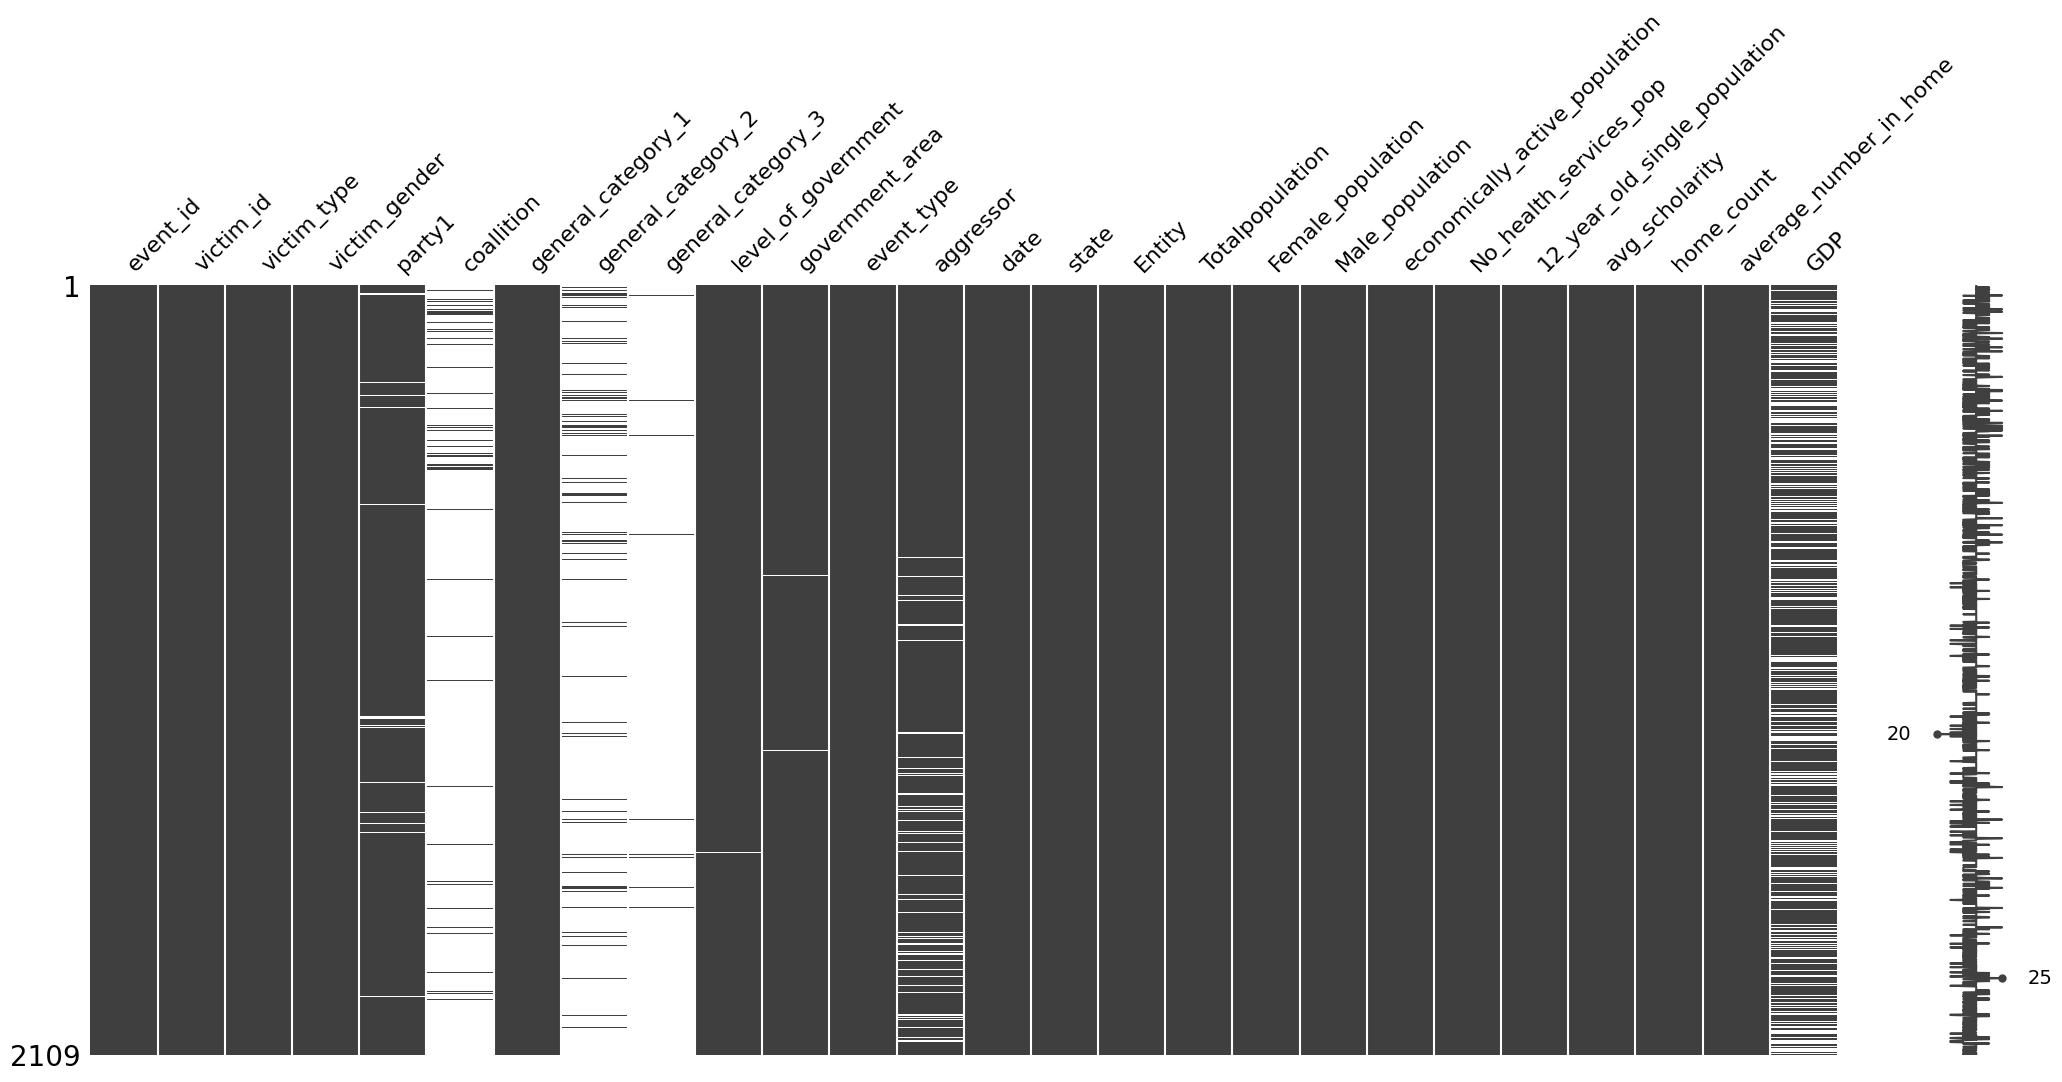

In [23]:
#Visualizing missing values
msno.matrix(pdv)


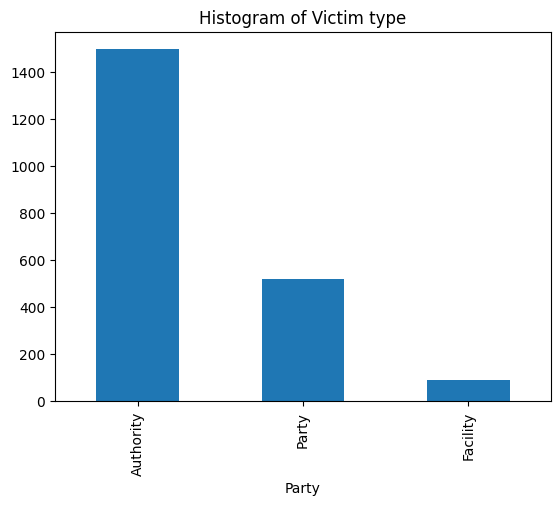

In [26]:
### victim_type FREQUENCY TABLE
#Frequency table for each categorical variable <- victim table
frequency_victim = pd.crosstab(index = pdv['victim_type'], columns = 'counts').sort_values(by='counts', ascending=False)
frequency_victim.plot(kind='bar', legend=False)

plt.xlabel('Party')
plt.title('Histogram of Victim type')


plt.show()


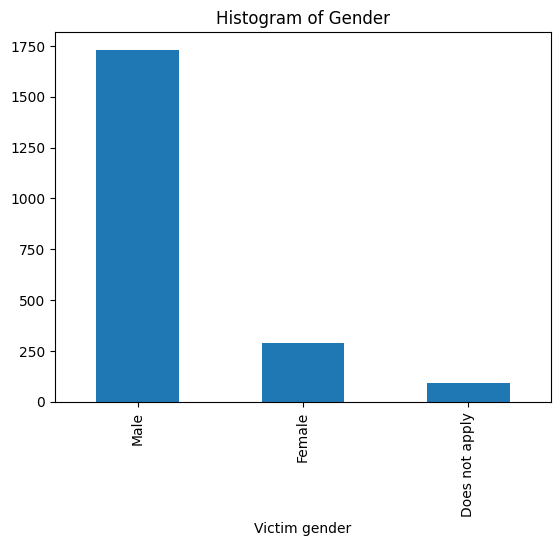

In [28]:
### victim_gender FREQUENCY TABLE
#Frequency table for each categorical variable <- victim table
#Stay with thre values and not available imputed by mode, does not apply respresents cadidates from the LBTQ++ community 
pdv.loc[pdv['victim_gender'] == 'Not Available', 'victim_gender'] = "Male" 
frequency_victim_gender = pd.crosstab(index = pdv['victim_gender'], columns = 'counts').sort_values(by='counts', ascending=False)
frequency_victim_gender.plot(kind='bar', legend=False)

plt.xlabel('Victim gender')
plt.title('Histogram of Gender')


plt.show()

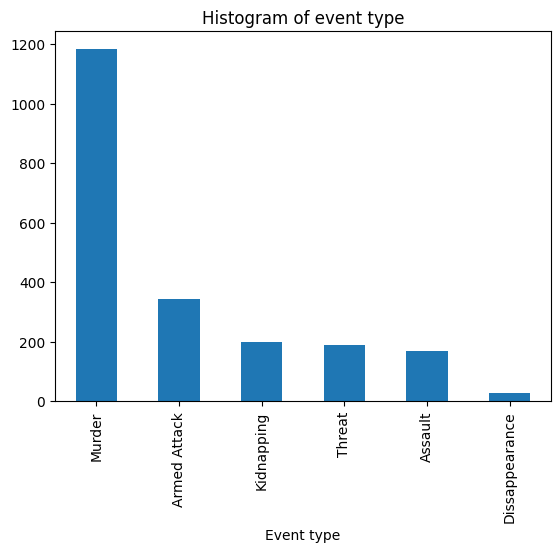

In [32]:
### party1 FREQUENCY TABLE
#Frequency table for each categorical variable <- victim table
frequency_event = pd.crosstab(index = pdv['event_type'], columns = 'counts').sort_values(by='counts', ascending=False)
frequency_event.plot(kind='bar', legend=False)

plt.xlabel('Event type')
plt.title('Histogram of event type')


plt.show()

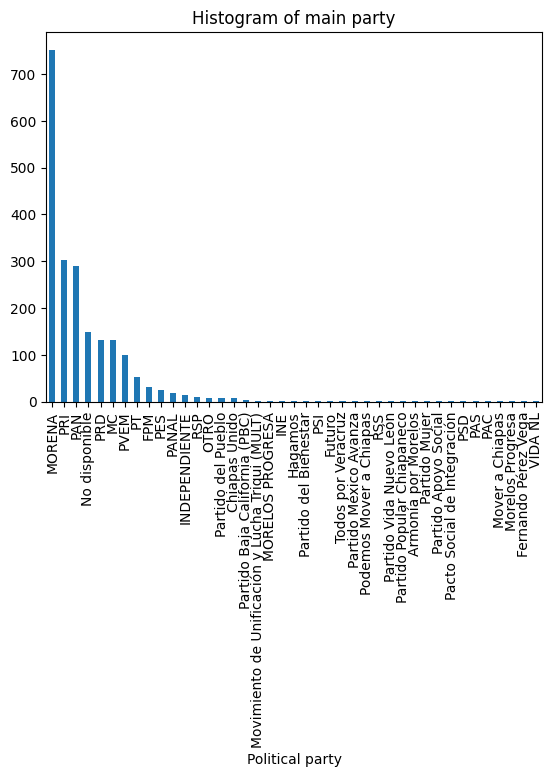

col_0,counts
party1,
MORENA,752
PRI,303
PAN,291
No disponible,148
PRD,132
MC,131
PVEM,99
PT,53
FPM,31


In [50]:
frequency_event_party = pd.crosstab(index = pdv['party1'], columns = 'counts').sort_values(by='counts', ascending=False)
frequency_event_party.plot(kind='bar', legend=False)

plt.xlabel('Political party')
plt.title('Histogram of main party')


plt.show()
frequency_event_party

#Remove outliers frequence less than 10



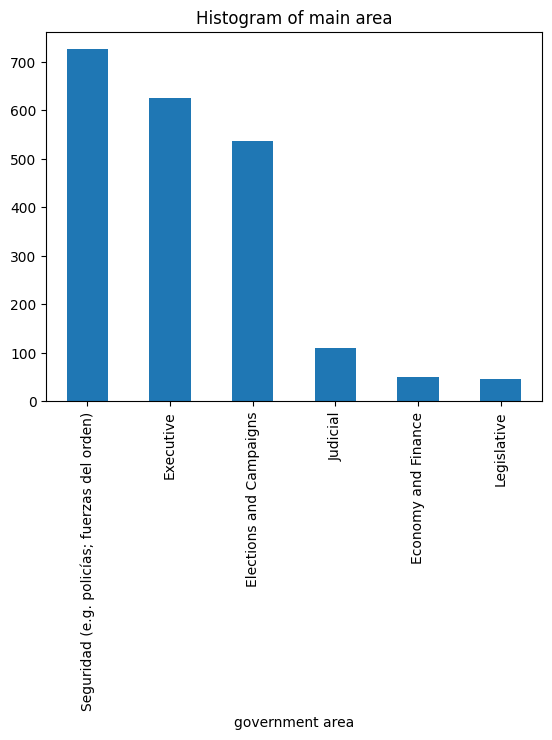

In [38]:
### level_of_government & government_area FREQUENCY TABLE
#Frequency table for each categorical variable <- victim table
frequency_government_area = pd.crosstab(index = pdv['government_area'], columns = 'counts').sort_values(by='counts', ascending=False)
frequency_government_area.plot(kind='bar', legend=False)

plt.xlabel('government area')
plt.title('Histogram of main area')


plt.show()



In [43]:
#Handling missing values
#Drop coalition and general category 2, 3 and coalition in totality because of the few data points we have 
columns_to_drop_missing = ['general_category_2', 'general_category_3','coallition']
pdv= pdv.drop(columns= columns_to_drop_missing)



In [131]:
#For GDP fill with same state data, the prescence missing value is due to the fact that there are some typos but there is information for each state 
data = data.replace() ##### NOT COMPLETE YET I NEED TO FIND DATASET #####
#we should fill with respective state 
#Aditionally it would be nice to show the gdp value for each state
gdp_by_state = pdv.groupby('state')['GDP'].unique()
print(gdp_by_state)


state
Baja_California                           [nan]
Chiapas                            [261684.516]
Chihuahua                          [572880.305]
Colima                             [109098.972]
Guanajuato                         [701795.455]
Guerrero                           [240749.756]
Michoacan_de_Ocampo                       [nan]
Morelos                            [201049.316]
Nuevo_Leon                                [nan]
Oaxaca                             [252892.486]
Puebla                             [595393.262]
Veracruz_de_Ignacio_de_la_Llave           [nan]
Zacatecas                          [151882.034]
Name: GDP, dtype: object


/var/folders/1q/6c5y6hn52rl9vsmk39wp17vh0000gn/T/ipykernel_99306/3728239113.py:2: FutureWarning: DataFrame.replace without 'value' and with non-dict-like 'to_replace' is deprecated and will raise in a future version. Explicitly specify the new values instead.
  data = data.replace() ##### NOT COMPLETE YET I NEED TO FIND DATASET #####


In [ ]:
#For level_of_government and government_area drop those rows since they are only a few missing 
columns_to_drop_rows = ['level_of_government', 'government_area']
for col in columns_to_drop_rows:
    pdv.dropna(subset=[col], inplace=True)

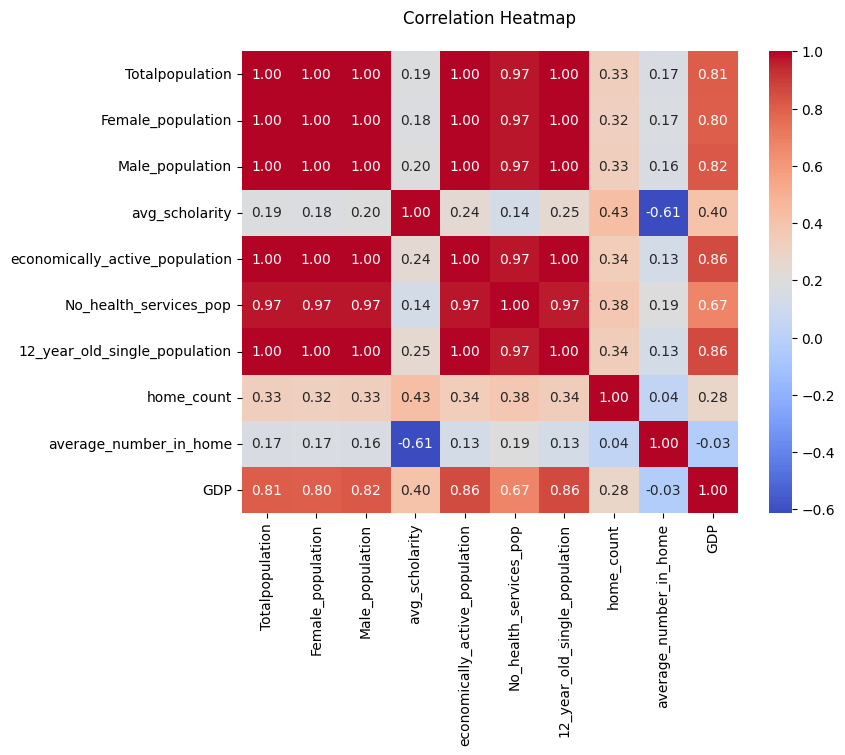

In [39]:
import matplotlib.pyplot as plt
numerical_columns = ['Totalpopulation', 'Female_population', 'Male_population', 'avg_scholarity',
                     'economically_active_population', 'No_health_services_pop', 
                     '12_year_old_single_population', 'home_count', 'average_number_in_home', 'GDP']

correlation_matrix = (pdv[numerical_columns]).corr()

plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap', pad=20)
plt.show()


In [ ]:
#We are interested in looking at the effect of different gender population, lack of health services, young males population and  total population, we do not eliminate these variables
#economically active population can be omitted in the analysys since it provides the same information as GDP 

pdv= pdv.drop(columns='economically_active_population', axis=1)


<Axes: >

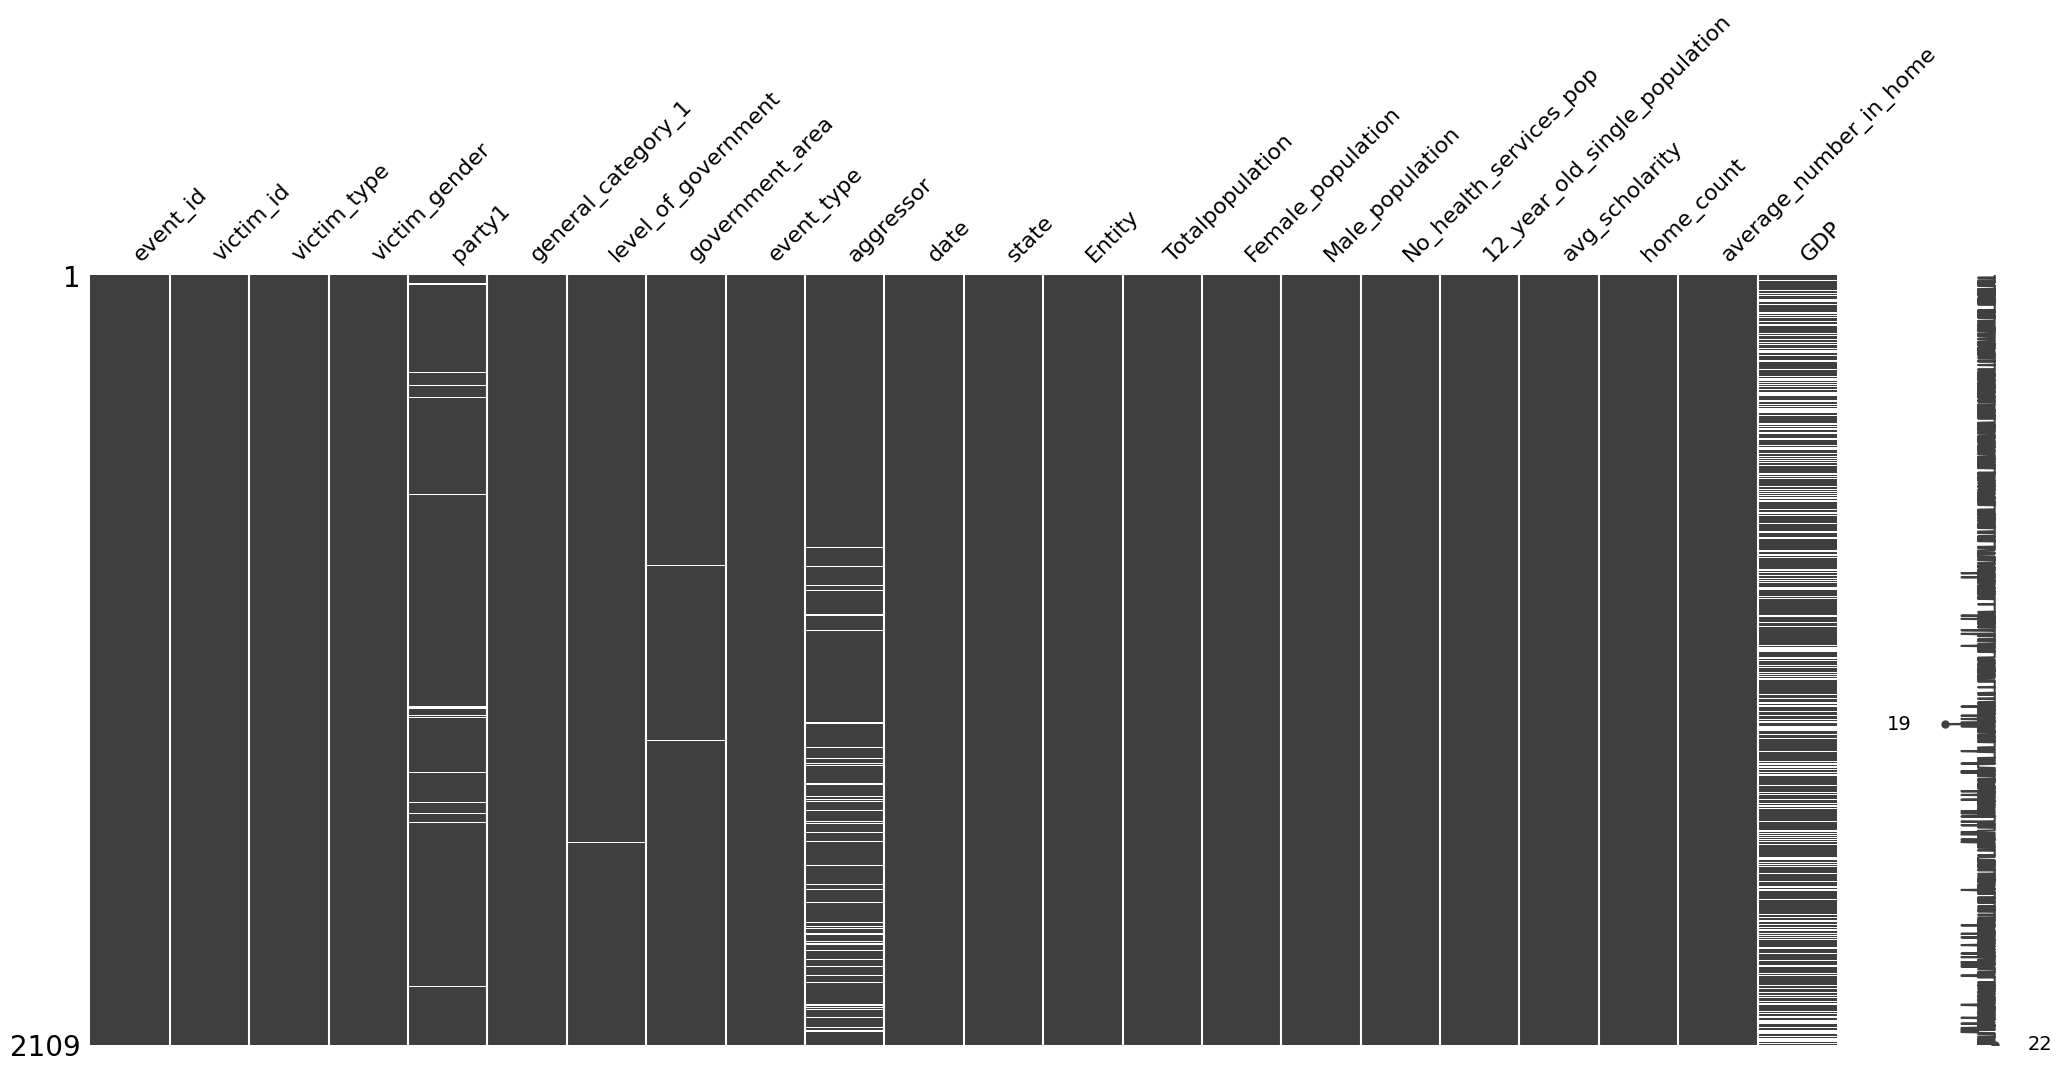

In [48]:
msno.matrix(pdv)